This script is written to get atmospheric data (pressure, temperature, etc., as a function of altitude, from a local data file.  The data is then plotted, and fit with a user-defined function

In [10]:
import numpy as np
import matplotlib.pyplot as plt

use_errors = False
fit_type = 1

Define a user funcion for fitting the data.

In [11]:
if fit_type == 1:
    def fitfunction(x,a,b):
        return a*np.exp(b*np.array(x))
else:
    def fitfunction(x,a,b,c):
        return a*np.exp(b*np.array(x)+c*np.power(np.array(x),1.5))

Define python arrays to store the data.

In [12]:
altitude = []
temp = []
gravity = []
pressure = []
density = []
viscosity = []

Read data from the filem and store in the above python arrays.

In [13]:
npoints = 0
with open('density.txt') as f:
    for line in f:
        npoints=npoints+1
        data = line.split()
        altitude.append(float(data[0]))
        temp.append(float(data[1]))
        gravity.append(float(data[2]))
        pressure.append(float(data[3]))
        density.append(float(data[4]))
        viscosity.append(float(data[5]))
        

In [14]:

if use_errors == True:
    # create a list to hold the uncertainty in the gravity  
    gravity_uncertainty = [0.01,0.01,0.01,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.0001,0.0001,0.0001,0.00001,0.00001,0.000001,0.0000001,0.0000001]
else:
    gravity_uncertainty = [0.0]*len(gravity)

gravity_uncertainty = np.array(gravity_uncertainty)

Text(0, 0.5, 'Gravity (m/s^2)')

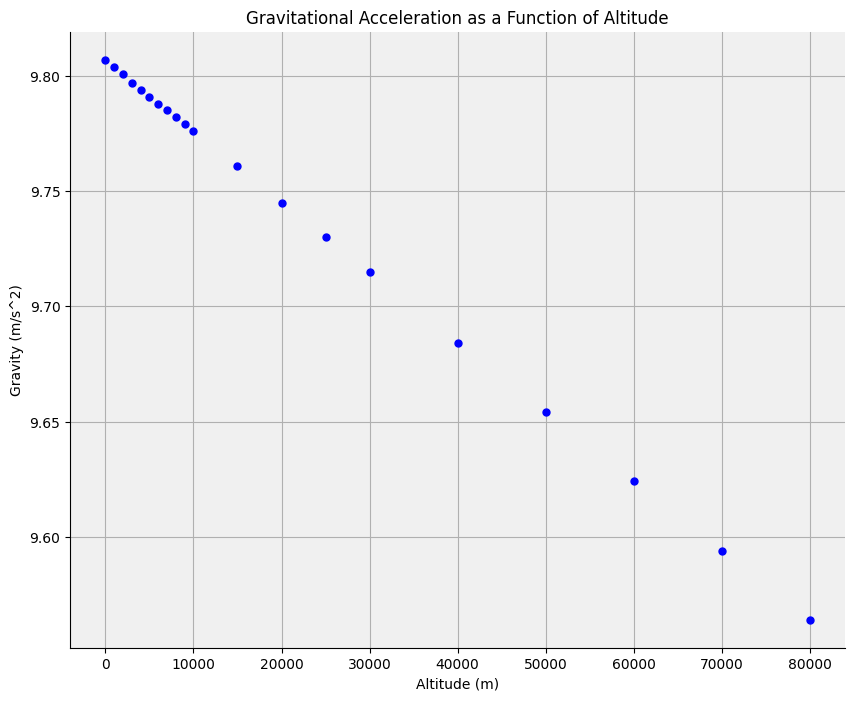

In [15]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
if use_errors == True:
    plt.errorbar(altitude, gravity, yerr=gravity_uncertainty, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color)
else:
    plt.plot(altitude, gravity, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color)

# Set the plot title and axis labels
plt.title("Gravitational Acceleration as a Function of Altitude")
plt.xlabel("Altitude (m)")
plt.ylabel("Gravity (m/s^2)")
#plt.yscale("log")

Fit the data with the pre-defined function

In [16]:
from scipy.optimize import curve_fit

if fit_type == 1:
    init_vals = [10.0,-0.0001]
else:
    init_vals = [10.0,-0.0001, -0.000001]

if use_errors == False:
    popt, pcov = curve_fit(fitfunction, altitude, gravity, p0=init_vals)
else:
    popt, pcov = curve_fit(fitfunction, altitude, gravity, sigma=gravity_uncertainty, absolute_sigma=True, p0=init_vals)

print (popt)
print (pcov)

[ 9.80661109e+00 -3.13369232e-07]
[[ 8.37873839e-09 -1.77980139e-14]
 [-1.77980139e-14  8.29153684e-20]]


In [17]:
yfit = []
chi2=0
for i in range (0,npoints):
    yfit.append(fitfunction(altitude[i],*popt))
    chi2 += (gravity[i]-yfit[i])*(gravity[i]-yfit[i])

print ("Chi^2 / dof = %.3E / %d" % (chi2,npoints-len(init_vals)))

Chi^2 / dof = 1.618E-06 / 18


Draw the graph

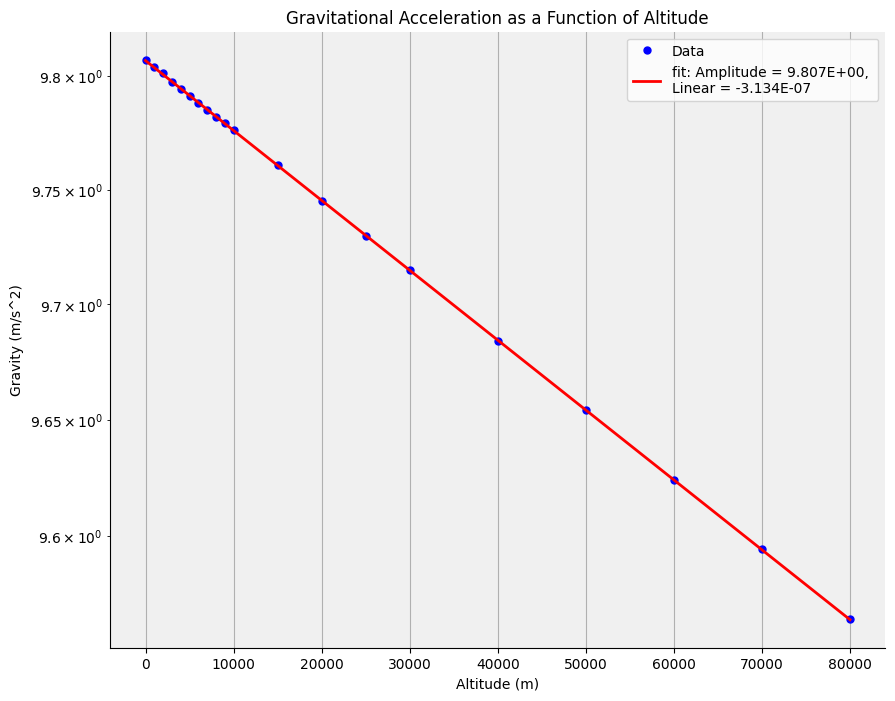

In [18]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
plt.plot(altitude, gravity, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color, label='Data')
if fit_type == 1:
    plt.plot(altitude,yfit,color='r', linewidth=2, label = 'fit: Amplitude = %.3E, \nLinear = %.3E' % tuple(popt))
else:
    plt.plot(altitude,yfit,color='r', linewidth=2, label = 'fit: Amplitude = %.3E, \nLinear = %.3E, \nQuadratic = %.3E' % tuple(popt))

# Set the plot title and axis labels
plt.title("Gravitational Acceleration as a Function of Altitude")
plt.xlabel("Altitude (m)")
plt.ylabel("Gravity (m/s^2)")
plt.yscale("log")
plt.legend()

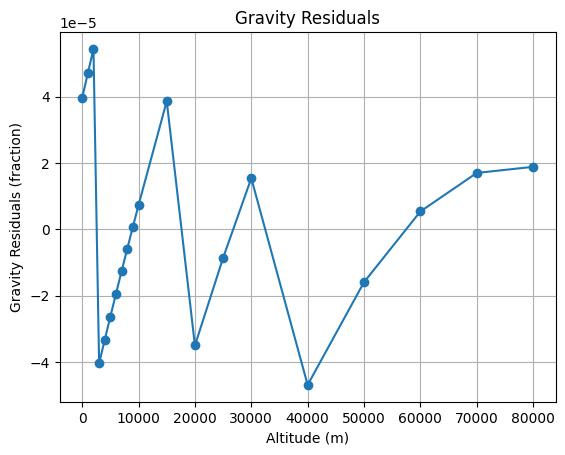

In [19]:
plt.title("Gravity Residuals")
plt.xlabel('Altitude (m)')
plt.ylabel('Gravity Residuals (fraction)')
plt.grid(True)

plt.plot(altitude, (gravity - fitfunction(altitude, *popt))/gravity, 'o-')

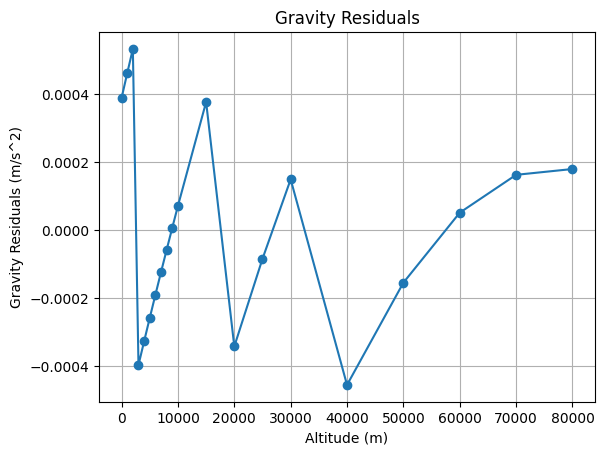

In [20]:
plt.title("Gravity Residuals")
plt.xlabel('Altitude (m)')
plt.ylabel('Gravity Residuals (m/s^2)')
plt.grid(True)

plt.plot(altitude, (gravity - fitfunction(altitude, *popt)), 'o-')
residuals = (gravity - fitfunction(altitude, *popt))
popt_exponential = popt

In [21]:
init_vals = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

def residualfunction(x,a,b,c,d,e,f,g,h):
    return a+b*np.power(np.array(x),1)+c*np.power(np.array(x),2)+d*np.power(np.array(x),3)+e*np.power(np.array(x),4)+f*np.power(np.array(x),5)+g*np.power(np.array(x),6)+h*np.power(np.array(x),7)


In [22]:
if use_errors == False:
    popt, pcov = curve_fit(residualfunction, altitude, residuals, p0=init_vals)
else:
    popt, pcov = curve_fit(residualfunction, altitude, residuals, sigma=gravity_uncertainty, absolute_sigma=True, p0=init_vals)

In [23]:
print (popt, pcov)

[ 5.33478073e-04 -2.98844326e-07  4.44548234e-11 -2.75411759e-15
  8.44644838e-20 -1.36561486e-24  1.11974234e-29 -3.67644702e-35] [[ 4.66200862e-08 -2.24013431e-11  3.34961796e-15 -2.19093306e-19
   7.25376588e-24 -1.27079037e-28  1.12280722e-33 -3.93654776e-39]
 [-2.24013431e-11  1.69145951e-14 -3.02123177e-18  2.15599430e-22
  -7.50763163e-27  1.35881771e-31 -1.22801235e-36  4.37688086e-42]
 [ 3.34961796e-15 -3.02123177e-18  5.87417041e-22 -4.38701993e-26
   1.57168051e-30 -2.90047920e-35  2.65853592e-40 -9.57714511e-46]
 [-2.19093306e-19  2.15599430e-22 -4.38701993e-26  3.37237342e-30
  -1.23298137e-34  2.30998642e-39 -2.14192937e-44  7.78657072e-50]
 [ 7.25376588e-24 -7.50763163e-27  1.57168051e-30 -1.23298137e-34
   4.57807555e-39 -8.68074428e-44  8.12624485e-49 -2.97685491e-54]
 [-1.27079037e-28  1.35881771e-31 -2.90047920e-35  2.30998642e-39
  -8.68074428e-44  1.66195966e-48 -1.56798407e-53  5.78062114e-59]
 [ 1.12280722e-33 -1.22801235e-36  2.65853592e-40 -2.14192937e-44
   8.

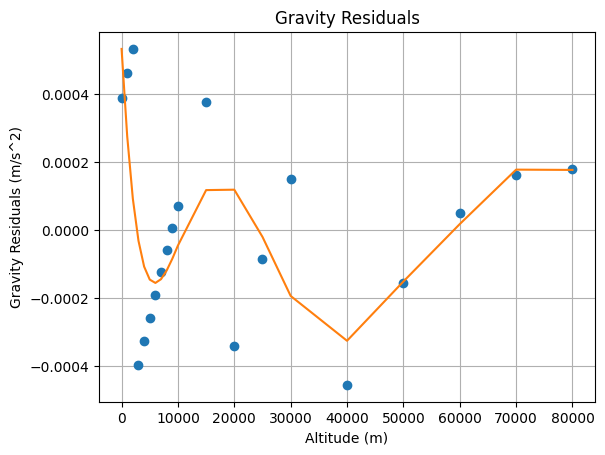

In [24]:
plt.title("Gravity Residuals")
plt.xlabel('Altitude (m)')
plt.ylabel('Gravity Residuals (m/s^2)')
plt.grid(True)


plt.plot(altitude, residuals, 'o')
plt.plot(altitude, residualfunction(altitude, *popt), '-')

In [25]:
popt_combined = [popt_exponential[0], popt_exponential[1], popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6], popt[7]]

In [26]:
def fitfunction_combined(x,a0,a1,a,b,c,d,e,f,g,h):
    return a0*np.exp(a1*np.array(x))+a+b*np.power(np.array(x),1)+c*np.power(np.array(x),2)+d*np.power(np.array(x),3)+e*np.power(np.array(x),4)+f*np.power(np.array(x),5)+g*np.power(np.array(x),6)+h*np.power(np.array(x),7)

In [27]:
init_vals = popt_combined
if use_errors == False:
    popt, pcov = curve_fit(fitfunction_combined, altitude, gravity, p0=init_vals)
else:
    popt, pcov = curve_fit(fitfunction_combined, altitude, gravity, sigma=gravity_uncertainty, absolute_sigma=True, p0=init_vals)

In [28]:
print (popt, pcov)

[ 9.80661109e+00 -3.13369232e-07  5.33478073e-04 -2.98844326e-07
  4.44548234e-11 -2.75411759e-15  8.44644838e-20 -1.36561486e-24
  1.11974234e-29 -3.67644702e-35] [[ 1.83691618e+02  4.14271067e-04 -1.83697966e+02 -4.00381440e-03
   9.41240924e-10  3.18222786e-14 -1.47292836e-18  3.37706699e-23
  -3.73406933e-28  1.57991983e-33]
 [ 4.14271067e-04  3.54843405e-09 -4.14283226e-04 -3.46665418e-08
   1.03629683e-14  5.58614421e-20 -2.85111494e-24  6.86143660e-29
  -7.83424193e-34  3.38766017e-39]
 [-1.83697966e+02 -4.14283226e-04  1.83704315e+02  4.00393159e-03
  -9.41262633e-10 -3.18236544e-14  1.47298836e-18 -3.37719957e-23
   3.73421233e-28 -1.57997930e-33]
 [-4.00381440e-03 -3.46665418e-08  4.00393159e-03  3.38689858e-07
  -1.01331166e-13 -5.37363655e-19  2.74792557e-23 -6.61901992e-28
   7.56175168e-33 -3.27105786e-38]
 [ 9.41240924e-10  1.03629683e-14 -9.41262633e-10 -1.01331166e-13
   3.15023550e-20  6.02855986e-26 -4.17802366e-30  1.14457613e-34
  -1.40940111e-39  6.39370560e-45]
 

Chi^2 / dof = 8.901E-07 / 10


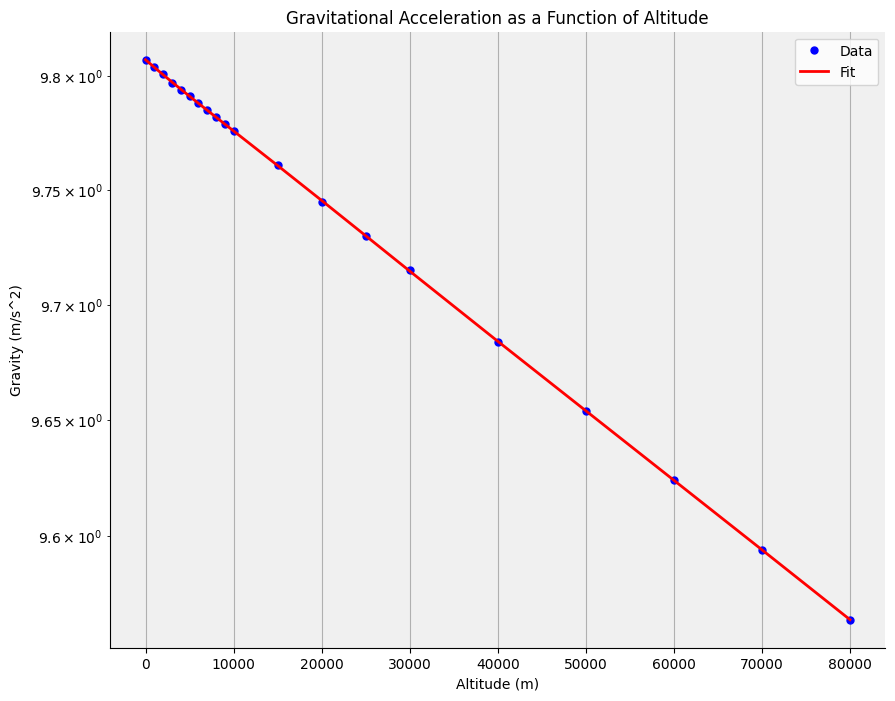

In [29]:
yfit = []
chi2=0
for i in range (0,npoints):
    yfit.append(fitfunction_combined(altitude[i],*popt))
    chi2 += (gravity[i]-yfit[i])*(gravity[i]-yfit[i])
    
print ("Chi^2 / dof = %.3E / %d" % (chi2,npoints-len(init_vals)))

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
plt.plot(altitude, gravity, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color, label='Data')

plt.plot(altitude,np.abs(yfit),color='r', linewidth=2, label = "Fit")

# Set the plot title and axis labels
plt.title("Gravitational Acceleration as a Function of Altitude")
plt.xlabel("Altitude (m)")
plt.ylabel("Gravity (m/s^2)")
plt.yscale("log")
plt.legend()